In [1]:
import numpy as np
import torch

In [20]:
import matplotlib.pyplot as plt

In [133]:
noise_distribution = Uniform(-0.5, 0.5)
base_distribution = Uniform(0, 1)
transforms = [SigmoidTransform().inv, AffineTransform(loc = 0, scale=0.1)]
logistic = TransformedDistribution(base_distribution, transforms)

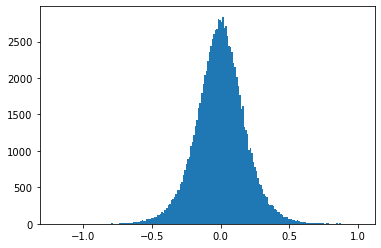

In [135]:
plt.hist(values, bins = 200)
plt.show()

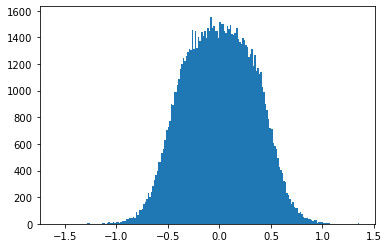

In [136]:
plt.hist(values_noise, bins = 200)
plt.show()

In [144]:
def logistic_pdf(x, mu, s):
    
    return (np.exp(-(x-mu)/s)) / (s*np.square(1+np.exp(-(x-mu)/s)))

def logistic_cdf(x, mu, s):
    
    return  1 / (1 + np.exp(-(x - mu)/s))

def noise_added_logistic_distribution(x, s):
    
    # assume mu = 0
    
    return logistic_cdf(x, -0.5, s) - logistic_cdf(x, 0.5, s)

In [140]:
x = np.linspace(-10, 10, 1000)

In [163]:
y = noise_added_logistic_distribution(x, 0.01)
y2 = logistic_pdf(x, 0, 0.01)

/tmp/ipykernel_171028/1317350341.py:7: RuntimeWarning: overflow encountered in exp
  return  1 / (1 + np.exp(-(x - mu)/s))
/tmp/ipykernel_171028/1317350341.py:3: RuntimeWarning: overflow encountered in exp
  return (np.exp(-(x-mu)/s)) / (s*np.square(1+np.exp(-(x-mu)/s)))
/tmp/ipykernel_171028/1317350341.py:3: RuntimeWarning: overflow encountered in square
  return (np.exp(-(x-mu)/s)) / (s*np.square(1+np.exp(-(x-mu)/s)))
/tmp/ipykernel_171028/1317350341.py:3: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(-(x-mu)/s)) / (s*np.square(1+np.exp(-(x-mu)/s)))


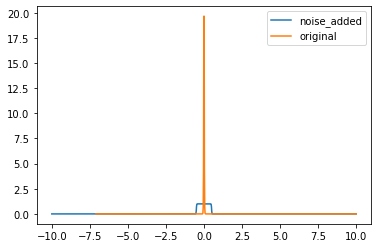

In [164]:
fig, ax = plt.subplots(1,1)
ax.plot(x, y, label='noise_added')
ax.plot(x, y2, label='original')
plt.legend()